In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/LAXMI NISHAD/OneDrive/Desktop/Data Science Project - CodSoft/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Missing Value Treatment

<Axes: >

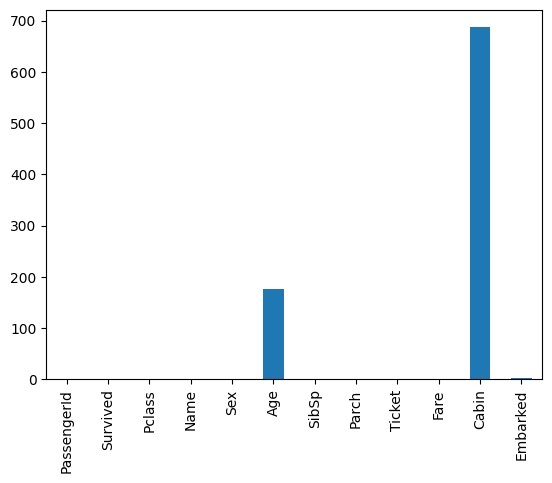

In [6]:
df.isna().sum().plot(kind='bar')

In [7]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

<Axes: >

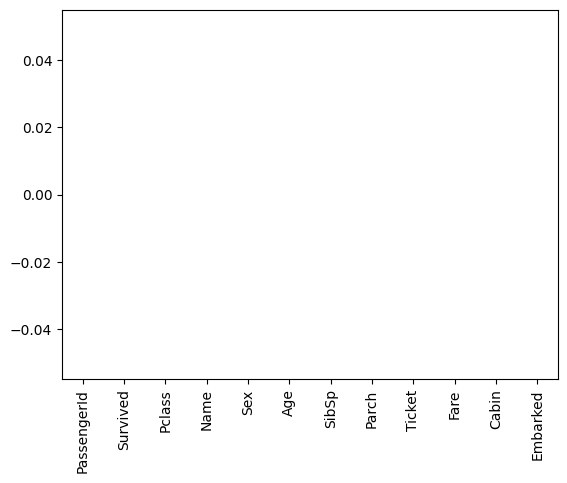

In [8]:
df.isna().sum().plot(kind='bar')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [10]:
# Univariate Analysis

In [11]:
# Categorical Variable

Text(0.5, 1.0, 'Survival Count')

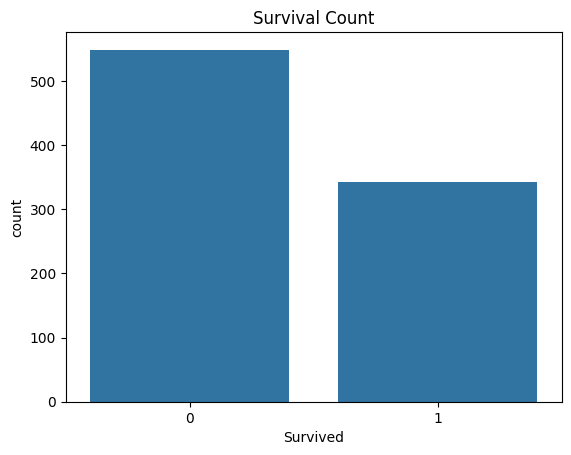

In [12]:
sns.countplot(data=df,x='Survived')
plt.title('Survival Count')

Text(0.5, 1.0, 'Sex Distribution')

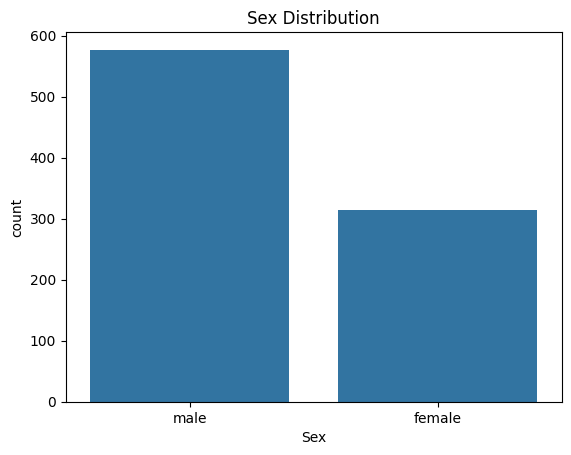

In [13]:
sns.countplot(data=df,x='Sex')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Passenger Class Distribution')

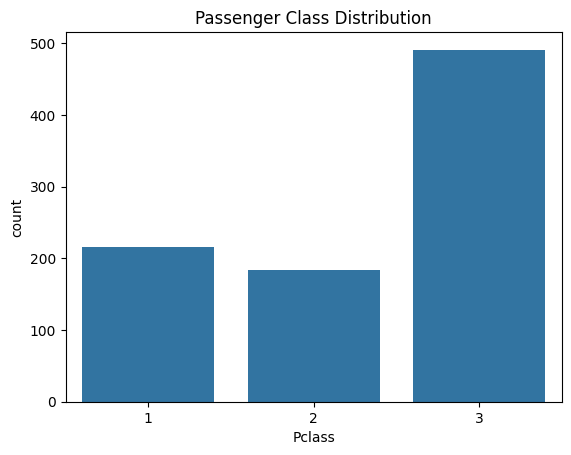

In [14]:
sns.countplot(data=df,x='Pclass')
plt.title('Passenger Class Distribution')

In [15]:
# Numerical Variable

Text(0.5, 1.0, 'Age Distribution')

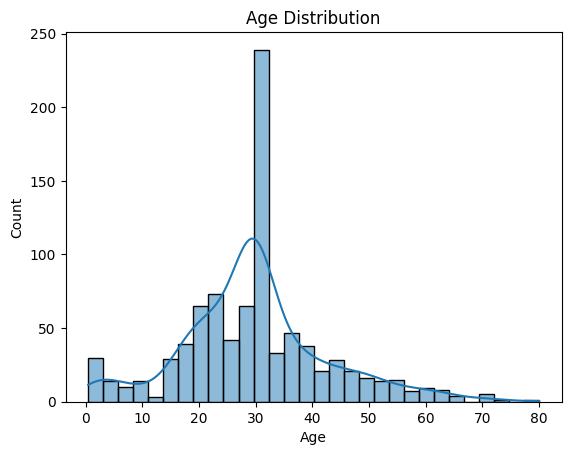

In [16]:
sns.histplot(data=df,x='Age',kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

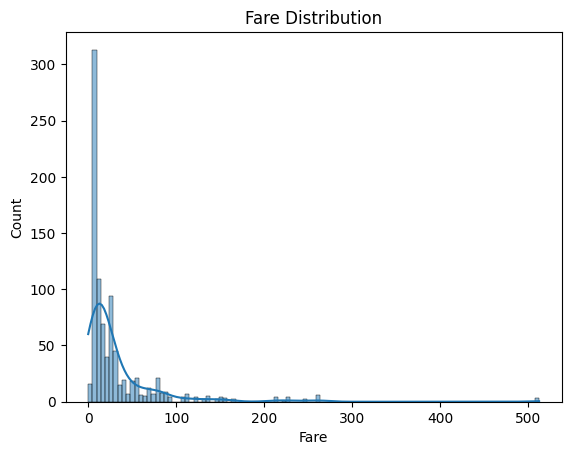

In [17]:
sns.histplot(data=df,x='Fare',kde=True)
plt.title('Fare Distribution')

In [18]:
# Bivariate Analysis

Text(0.5, 1.0, 'Survival by Sex')

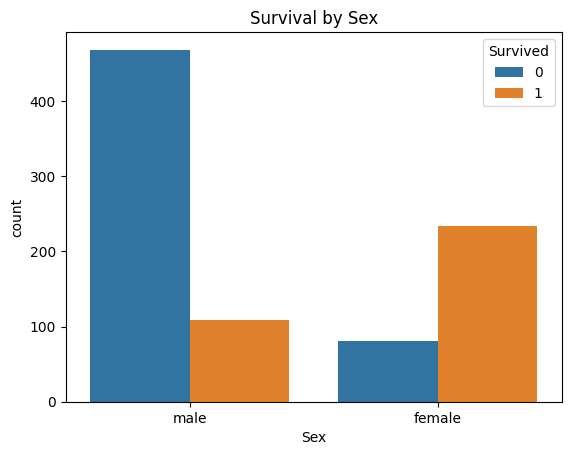

In [19]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.title('Survival by Sex')

Text(0.5, 1.0, 'Survival by Passenger Class')

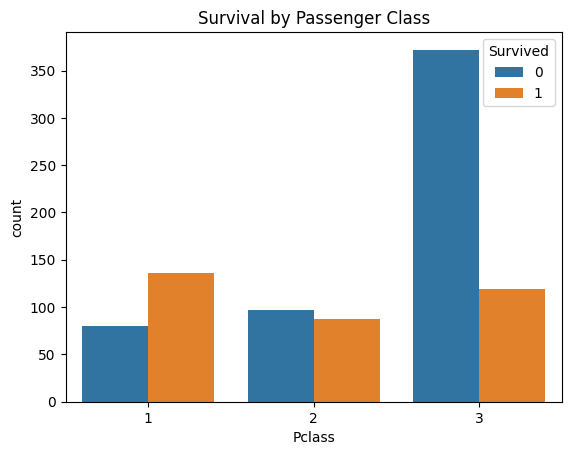

In [20]:
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title('Survival by Passenger Class')

Text(0.5, 1.0, 'Survival by Embarked')

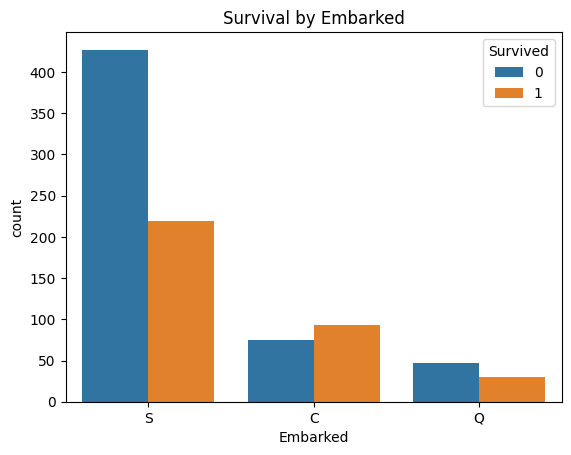

In [21]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.title('Survival by Embarked')

In [22]:
# Multivariate Analysis

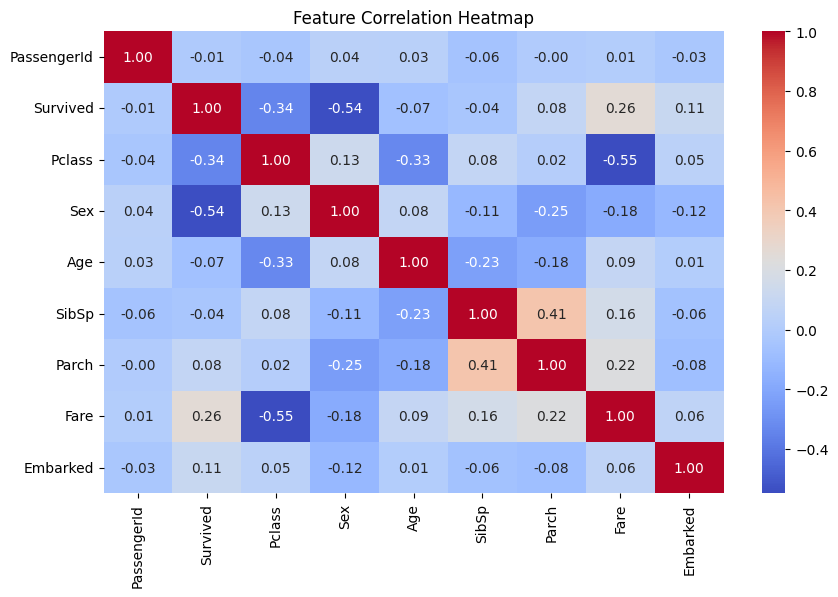

In [23]:
# Encode 'Sex' for correlation
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male':1, 'female':0})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S':0, 'C':1, 'Q':2})
df_encoded.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
X=df.drop(labels=['Name','Ticket','Cabin','Survived'],axis=1)
Y=df[['Survived']]

In [25]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
1,2,1,female,38.000000,1,0,71.2833,C
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S
887,888,1,female,19.000000,0,0,30.0000,S
888,889,3,female,29.699118,1,2,23.4500,S
889,890,1,male,26.000000,0,0,30.0000,C


In [26]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [27]:
cat=[]
num=[]
for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)

In [28]:
Xcat=X[cat]
Xnum=X[num]

In [29]:
Xcat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [30]:
Xnum

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


# Data Prerocessing

In [31]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [32]:
le=LabelEncoder()
ss=StandardScaler()

In [33]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\LAXMI NISHAD\AppData\Local\Temp\ipykernel_18060\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\LAXMI NISHAD\AppData\Local\Temp\ipykernel_18060\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])


In [34]:
Xcat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [35]:
Xnum=pd.DataFrame(ss.fit_transform(Xnum),columns=num)

In [36]:
Xnum

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [37]:
X=Xnum.join(Xcat)

In [38]:
out=[]
for i in Xnum.columns:
    o=Xnum[(Xnum[i]<-3) | (Xnum[i]>3)].index
    out.extend(o)

In [39]:
out

[96,
 116,
 493,
 630,
 672,
 745,
 851,
 16,
 50,
 59,
 68,
 71,
 119,
 159,
 164,
 171,
 180,
 182,
 201,
 233,
 261,
 266,
 278,
 324,
 386,
 480,
 541,
 542,
 683,
 686,
 787,
 792,
 813,
 824,
 846,
 850,
 863,
 13,
 25,
 86,
 167,
 360,
 437,
 438,
 567,
 610,
 638,
 678,
 736,
 774,
 858,
 885,
 27,
 88,
 118,
 258,
 299,
 311,
 341,
 377,
 380,
 438,
 527,
 557,
 679,
 689,
 700,
 716,
 730,
 737,
 742,
 779]

In [40]:
a=list(set(out))

In [41]:
X=X.drop(index=a,axis=0)
Y=Y.drop(index=a,axis=0)

In [42]:
X.index=range(0,X.shape[0])
Y.index=range(0,Y.shape[0])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
xtrain.shape

(656, 8)

In [46]:
xtest.shape

(164, 8)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr=LogisticRegression()

In [49]:
model=lr.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Score : ',tr_acc)
print('Testning Score : ',ts_acc)

Training Score :  0.7850609756097561
Testning Score :  0.8292682926829268


In [53]:
tr_report=classification_report(ytrain,tr_pred)
ts_report=classification_report(ytest,ts_pred)
print('Training Report : ',tr_report)
print('Testing Report : ',ts_report)

Training Report :                precision    recall  f1-score   support

           0       0.81      0.85      0.83       396
           1       0.75      0.69      0.72       260

    accuracy                           0.79       656
   macro avg       0.78      0.77      0.77       656
weighted avg       0.78      0.79      0.78       656

Testing Report :                precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.78      0.75      0.76        60

    accuracy                           0.83       164
   macro avg       0.82      0.81      0.81       164
weighted avg       0.83      0.83      0.83       164



In [54]:
tr_mat=confusion_matrix(ytrain,tr_pred)
ts_mat=confusion_matrix(ytest,ts_pred)
print('Training Matirx : ',tr_mat)
print('Testing Matrix : ',ts_mat)

Training Matirx :  [[335  61]
 [ 80 180]]
Testing Matrix :  [[91 13]
 [15 45]]


# Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [57]:
model=rfc.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [58]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [59]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Score : ',tr_acc)
print('Testning Score : ',ts_acc)

Training Score :  1.0
Testning Score :  0.8353658536585366


In [60]:
tr_report=classification_report(ytrain,tr_pred)
ts_report=classification_report(ytest,ts_pred)
print('Training Report : ',tr_report)
print('Testing Report : ',ts_report)

Training Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       260

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656

Testing Report :                precision    recall  f1-score   support

           0       0.85      0.90      0.87       104
           1       0.81      0.72      0.76        60

    accuracy                           0.84       164
   macro avg       0.83      0.81      0.82       164
weighted avg       0.83      0.84      0.83       164



In [61]:
tr_mat=confusion_matrix(ytrain,tr_pred)
ts_mat=confusion_matrix(ytest,ts_pred)
print('Training Matirx : ',tr_mat)
print('Testing Matrix : ',ts_mat)

Training Matirx :  [[396   0]
 [  0 260]]
Testing Matrix :  [[94 10]
 [17 43]]


# Cross Validation

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(xtrain, ytrain)
print("Best Params:", grid.best_params_)


C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Best Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
rfc=RandomForestClassifier(max_depth=4,min_samples_split=2,n_estimators=200)

In [66]:
model=rfc.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [67]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [68]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Score : ',tr_acc)
print('Testning Score : ',ts_acc)

Training Score :  0.8414634146341463
Testning Score :  0.8475609756097561


In [69]:
tr_report=classification_report(ytrain,tr_pred)
ts_report=classification_report(ytest,ts_pred)
print('Training Report : ',tr_report)
print('Testing Report : ',ts_report)

Training Report :                precision    recall  f1-score   support

           0       0.82      0.95      0.88       396
           1       0.89      0.68      0.77       260

    accuracy                           0.84       656
   macro avg       0.86      0.81      0.83       656
weighted avg       0.85      0.84      0.84       656

Testing Report :                precision    recall  f1-score   support

           0       0.84      0.94      0.89       104
           1       0.87      0.68      0.77        60

    accuracy                           0.85       164
   macro avg       0.85      0.81      0.83       164
weighted avg       0.85      0.85      0.84       164

